In [6]:
import numpy as np
import matplotlib.pyplot as pl
from numpy import random
import scipy.stats as sp 
import scipy.integrate as integrate
from numpy.random import randn
from scipy.interpolate import interp1d 
from copy import deepcopy
from scipy.ndimage import convolve, generate_binary_structure
import pandas as pd
import pyfftw
import scipy as sp
from matplotlib import cm
from scipy.signal import find_peaks
from scipy.signal import bessel,butter,filtfilt

# Individual level model

In [2]:
#Gillespie algorithm for the model
def Run(x,n_i,T_end,n_pt,pars,Rf,Rc):
    
########### Data
    n_t=[]
    times=np.linspace(0,T_end,n_pt)
    wc=0
    
############################### Setting lattice and parameters
    L=len(n_i)
    dx=x[1]-x[0]
    
    Lf=int(Rf//dx)
    Lc=int(Rc//dx)
    
    b,d,D,beta,gamma=pars
    
    h=2*D/(dx**2)
    
    N_i=sum(n_i)
    
    kf = np.ones(2*Lf+1)   # kernel
    kc = np.ones(2*Lc+1)   # kernel
    
    i=0
################################## LOOP
    while i<=T_end and N_i!=0:
    
    ############# Calculate the rates
        Nf = convolve(n_i, kf, mode='wrap')
        Nc = convolve(n_i, kc, mode='wrap')

        rates= (b+ beta*Nf/(2*Rf)+ d+ gamma*(Nc**2)/(4*(Rc**2))+ h)*n_i
        
        Gr=sum(rates)
        
    ############# Find the waiting time
        u1=random.uniform(0,1)
        d_t=-np.log(u1)/Gr 
        
    ############ Save data
        if i+d_t>times[wc]:
            print(str(100*(i/T_end))+'%')
            n_t.append(deepcopy(n_i))
            wc+=1

    ########### Select the transition
        u2=random.uniform(0,1)
        psum=0
        j=0

    #Select the site of the transition
        while psum<= u2:
            psum+=rates[j]/Gr
            j+=1

    #site=j-1
        psum=psum-rates[j-1]/Gr
        j=j-1

        rates_site_j=[]
        
        rates_site_j.append((b+ beta*Nf[j]/(2*Rf))*n_i[j]) #Birth in j from n (k=0)

        rates_site_j.append((d+ gamma*(Nc[j]**2)/(4*(Rc**2)))*n_i[j])#Death in j from n (k=1)

        rates_site_j.append((h/2)*n_i[j])# Diffusion in j from n (k=2) - Right
        rates_site_j.append(rates_site_j[2])# Diffusion in j from n (k=3) - Left

    #Select the transition in the site j
        k=0
        while psum<=u2:
            psum+=rates_site_j[k]/Gr
            k+=1

    #All possibilities

        if k-1==0:#Birth of n in j
            n_i[j]+=1
            N_i+=1

        elif k-1<4 and k-1!=0: # Death or difussion of n in j
            n_i[j]-=1

            if k-1==2:#Diffusion Right
                n_i[(j+1)%L]+=1

            elif k-1==3:#Diffusion Left
                n_i[(j-1)%L]+=1

            else:#Death
                N_i-=1

        i=i+d_t

    return n_t

In [5]:
#Running a simulation for a specific parameter choice
b=30
d=40
D=0.08

beta=4
gamma=0.1
pars=[b,d,D,beta,delta]
Rf=0.75
Rc=1

n_pt=10000
T_end=1

L=500
x=np.linspace(0,10,L)
dx=x[1]-x[0]

rho_s=(beta+ np.sqrt(beta**2 +4*(b-d)*gamma))//(2*gamma)+1

n_i=np.zeros(L)+round(rho_s*dx)
n_t=Run(x,n_i,T_end,n_pt,pars,Rf,Rc)

0.0%
0.009983286418624419%
0.01998431094063157%
0.0298206373525115%
0.0398161854074339%
0.04992608246832841%
0.05965822864281021%
0.06979554759510145%
0.07993900814632164%
0.08982258633419966%
0.10000794602377241%
0.10996159055323411%
0.11985502406135892%
0.1298431884204333%
0.1396586939427377%
0.1497532040496991%
0.1599284111713667%
0.1699320761304253%
0.18001456069036995%
0.18967440178193953%
0.19955222006369142%
0.20999015729835105%
0.2200011167749274%
0.22976150428201028%
0.23977800958613965%
0.24956367489837233%
0.259826020265405%
0.26989173441742464%
0.27961778207488824%
0.2898872499765154%
0.2998813587958257%
0.3088347297052268%
0.31982239791995987%
0.33002042767246836%
0.3399311825885877%
0.34973449767909887%
0.35996177297845705%
0.36991120468271776%
0.37966154592507867%
0.3900360586661393%
0.3998811117616087%
0.40963705619293755%
0.4196511190754042%
0.430039663319886%
0.4397629453379103%
0.4500069168298266%
0.45927601815823477%
0.46937315667080354%
0.47973470357876846%
0.48908

4.220310469930269%
4.22979795711826%
4.2398155486249385%
4.2502146839160355%
4.260168309725651%
4.27036314736018%
4.280401169082359%
4.289988695758913%
4.300363090269253%
4.3102250443071295%
4.319045168841347%
4.330425161251085%
4.3402757963235645%
4.350356468414979%
4.360273868013718%
4.370198439677373%
4.380286447570984%
4.389945810755177%
4.39977818636801%
4.410315165606908%
4.420027636558593%
4.428775495924111%
4.440190952368522%
4.449878488647201%
4.459980424768773%
4.470309424273472%
4.480363859232697%
4.4898100742833735%
4.5003301144214305%
4.50993616028236%
4.520371311788647%
4.530392813298064%
4.539813777755178%
4.549070240353566%
4.560037039167572%
4.570073578762282%
4.580451618581123%
4.59043523355709%
4.600418447843499%
4.610106872098845%
4.62028997129016%
4.6304385823224425%
4.640429459162316%
4.650442988566712%
4.660295508807632%
4.67037194853486%
4.680116363614265%
4.6902938370390315%
4.70041121827229%
4.7103879581652315%
4.720097069136937%
4.729619446086483%
4.739874940

8.530806735901027%
8.540505927282444%
8.55079363952682%
8.560746463608545%
8.570800714821464%
8.580798588403123%
8.590552366949408%
8.600594694407205%
8.610846709991513%
8.620639185170965%
8.630812771603145%
8.640702098423175%
8.650789187986442%
8.66085160791914%
8.670595817194846%
8.680859225743713%
8.690863237053865%
8.700759564896005%
8.710575830034934%
8.720378651957127%
8.730496750209744%
8.740646389616987%
8.750520847434156%
8.760873146239298%
8.770802055736693%
8.780862806866375%
8.79083785046935%
8.80085871103435%
8.81039012979346%
8.820708060466869%
8.830880568156706%
8.840675882465447%
8.850591271504431%
8.860461929467421%
8.870737675684188%
8.880840474374672%
8.890754860556523%
8.90086095637722%
8.910423719010744%
8.920782963344413%
8.930668193596011%
8.940702182118326%
8.950578583641045%
8.960657526139336%
8.970847338923166%
8.980889315579306%
8.990424883300498%
9.000378434050765%
9.010566229492527%
9.020614954010634%
9.030628801786076%
9.040485060112049%
9.050846092499693%

12.761140375910715%
12.77112058797997%
12.780835619717129%
12.79121485729534%
12.801264271467844%
12.811060331103183%
12.821086174158891%
12.83062463116866%
12.840839040629984%
12.851279799989685%
12.861146125918891%
12.870901428219996%
12.88110755241743%
12.89121633826655%
12.901113474930678%
12.91118901256065%
12.921068134241267%
12.930771674895148%
12.941258777618051%
12.951240107908468%
12.961222516317472%
12.971279566399755%
12.981218098412246%
12.990640067589391%
13.001126966767854%
13.011201759804198%
13.02128185253195%
13.031186129704805%
13.041216758491728%
13.051296417511827%
13.060952560556533%
13.07127185884519%
13.081056986719283%
13.091200917119933%
13.101298323200151%
13.111214498004179%
13.121093323544839%
13.13130149461785%
13.140875985438042%
13.150987684341864%
13.161236288649889%
13.171162709835386%
13.181087605235714%
13.191197564503328%
13.200919277432762%
13.211241420250088%
13.221241392735072%
13.231153051768388%
13.241320006163825%
13.251255231654612%
13.261314

16.941574005997737%
16.95160259924397%
16.96120323341415%
16.971577380829775%
16.98153996992074%
16.991634071956387%
17.001312880652474%
17.01157271281697%
17.02170067143153%
17.031540369092134%
17.041599747522085%
17.051501362919826%
17.06158271908023%
17.071596010499764%
17.081557697084175%
17.091696180954344%
17.10170148675119%
17.11167230397466%
17.121688261493297%
17.131647915490262%
17.141005395391076%
17.151655549389613%
17.161544055390728%
17.171671396362783%
17.181616909836272%
17.19167866747339%
17.201699335704664%
17.211569126500194%
17.22164872808591%
17.23162812066116%
17.24108230429348%
17.251458880829713%
17.26149869718783%
17.271440938758825%
17.281476681152885%
17.29171753519437%
17.301578217144232%
17.31145755038613%
17.321663038775903%
17.331668684482153%
17.34155643701347%
17.351278534367705%
17.36147826300326%
17.371406929365442%
17.38164211866179%
17.39142619213921%
17.40154534363663%
17.41172997932658%
17.42146221504668%
17.43146577550968%
17.441508289346295%
17.

21.13145334251467%
21.142054067678078%
21.151997143616764%
21.16208495032388%
21.171909165450295%
21.181962823411478%
21.191913004265793%
21.202101778935038%
21.21171945979096%
21.221774352153073%
21.23200302695226%
21.242086076000017%
21.252074166370456%
21.262106434111793%
21.27200621054119%
21.281771851767513%
21.292019728663902%
21.302046046600438%
21.31193421327345%
21.322021750131107%
21.331994427342558%
21.342112220640594%
21.351873817553667%
21.36154192467859%
21.372063983734833%
21.381869047651456%
21.39192471214064%
21.4020522672867%
21.41189610254836%
21.422053372336375%
21.432072014862563%
21.441705870785654%
21.452065704492345%
21.4619643510651%
21.472006978866837%
21.482140502414055%
21.491888933972753%
21.501603497469944%
21.512108650039135%
21.522028250195163%
21.532018091382934%
21.54215305175801%
21.552063734305925%
21.562017888759527%
21.57168097862541%
21.58165339546228%
21.592096034052073%
21.602062745981122%
21.611942449203873%
21.62208473739776%
21.63180714070894

25.322516316941158%
25.332518600430713%
25.342459648982267%
25.352471243602636%
25.362475047026585%
25.37251907000811%
25.38241696050908%
25.392456472526447%
25.402525396769114%
25.412447064818082%
25.422477307977882%
25.43236776459919%
25.442495402305937%
25.451977258749398%
25.462398773718363%
25.472057596460544%
25.48207118596598%
25.492524027004364%
25.502536264568594%
25.5125463256178%
25.522508161023694%
25.532495759106116%
25.542494216834395%
25.552387325234033%
25.562448665791255%
25.57249059639503%
25.582378407060713%
25.59252855967447%
25.602511307305402%
25.612340830284058%
25.62253395951803%
25.632506048710002%
25.642479538497742%
25.652239570812785%
25.66255562197663%
25.67254930484575%
25.682247466303803%
25.692541995479658%
25.702504643556534%
25.71237552147847%
25.722233614356675%
25.73233860496308%
25.74206698933011%
25.75257133312279%
25.762421508866012%
25.77255726881016%
25.78231908325863%
25.792338916416384%
25.802188448686813%
25.811945766983857%
25.82254576076871

29.522867673988447%
29.53270164027274%
29.542922909638886%
29.552934133479962%
29.562925240002887%
29.572881386589174%
29.58264844995511%
29.59288418482554%
29.602796485958056%
29.61293826823749%
29.622959366946123%
29.632948783897035%
29.642788058791293%
29.652180533985046%
29.66291360027319%
29.672875017387472%
29.682881375520637%
29.692926712080762%
29.702470144296%
29.712914803352714%
29.722813201480307%
29.732900319120265%
29.742801426654864%
29.752529814425856%
29.762440516836687%
29.77278797861429%
29.782627015826062%
29.7929129110616%
29.802934203578662%
29.81297762503609%
29.822932742601715%
29.832944688732187%
29.842734679924597%
29.852892376993477%
29.86288287515777%
29.87274203210366%
29.88288368279318%
29.892961320643735%
29.902945466631675%
29.91286648732256%
29.92295721686788%
29.93272015207047%
29.94267213719143%
29.95277492238509%
29.96298809491113%
29.972908758447026%
29.982227586407507%
29.992855966209987%
30.002926212170657%
30.01292427322054%
30.02269985069802%
30.

33.76317137695814%
33.773304385167265%
33.783358780754405%
33.793183880503804%
33.80329012529415%
33.81318954665794%
33.823372169574206%
33.83326539267632%
33.843319106760354%
33.8532513794626%
33.86311930515981%
33.873226142186496%
33.88330513999733%
33.89300953991952%
33.90322027801159%
33.91330230725346%
33.923325411684935%
33.93323280171779%
33.94332062271194%
33.95328982825948%
33.96316793673654%
33.97289579675068%
33.98322418969534%
33.9933198726223%
34.00339815027707%
34.0133182114287%
34.02315917803767%
34.03335987086831%
34.043381354303634%
34.05309513783676%
34.06325364163701%
34.07327760103026%
34.08312691191945%
34.09337199399437%
34.10315702923415%
34.11336611185444%
34.12332802021456%
34.13326945835508%
34.143231560906784%
34.15334236803786%
34.16330057455158%
34.173408933617225%
34.18340058776755%
34.193212341563694%
34.20276199014801%
34.21325246612208%
34.223158987077824%
34.2332644920676%
34.24340716107174%
34.2533966230908%
34.263308031611764%
34.273283441548195%
34.

38.05378744779217%
38.06331813691948%
38.07348585306618%
38.08371273830241%
38.093776874803794%
38.10368344812612%
38.11372584278858%
38.12372400666385%
38.13378608259789%
38.14378037318834%
38.153748962483036%
38.16363471598603%
38.17366140006882%
38.18365604839879%
38.19377816153865%
38.20375635441089%
38.2137654849654%
38.22347508659298%
38.233719988669044%
38.2437887264496%
38.25357849407317%
38.26370107532258%
38.27380887308375%
38.283564545175764%
38.293715128571996%
38.30359136503499%
38.3137183019946%
38.32376680827831%
38.33353453233857%
38.34374481126886%
38.35377236876496%
38.36306022893365%
38.37381337480636%
38.383711419657395%
38.39379651455249%
38.403729622241414%
38.413259209783035%
38.423689322828416%
38.433582588959474%
38.44375441084553%
38.45345844890868%
38.46373187188267%
38.47367030106758%
38.483355395945715%
38.49379648292009%
38.503689201331795%
38.51347859102824%
38.52345073131932%
38.53385172064936%
38.54364443108633%
38.55347663526132%
38.56378148664247%
38.

42.33413505642499%
42.344143203758655%
42.353967990444026%
42.36375109137843%
42.374077129563595%
42.38359890988951%
42.39420173527018%
42.40422863914851%
42.414133814218985%
42.42419941552877%
42.434114988183886%
42.44388665760035%
42.45415264516329%
42.463883972247494%
42.4741312414779%
42.4839643585947%
42.49421018968667%
42.50412356498772%
42.514173958764346%
42.524185624169306%
42.53412503511184%
42.544227679778004%
42.55424397583933%
42.56411716932924%
42.57414125402178%
42.584233315742395%
42.59419277218936%
42.604158857622465%
42.614213916976155%
42.62425029969024%
42.634195493848374%
42.643781003050236%
42.65413934269392%
42.664225612381514%
42.674125433555496%
42.68407293387671%
42.69425863098889%
42.70408060120941%
42.71420687672471%
42.72416603899114%
42.73426390653449%
42.74390480877012%
42.754175270676164%
42.76412473033416%
42.77426429150127%
42.78424217455777%
42.79420612861908%
42.80402902096772%
42.81424781225755%
42.824206433597574%
42.833920768173385%
42.84428043168

46.59455004099992%
46.604659409602576%
46.614595267704715%
46.624641037224364%
46.63460452843982%
46.64452235177642%
46.654609026664026%
46.66466345365051%
46.67461108011474%
46.68447058611701%
46.694236571615754%
46.70461603228354%
46.714139801939616%
46.724576182438476%
46.73461661345393%
46.744585545236816%
46.7546437882982%
46.76464033655403%
46.77457297477085%
46.78462575526514%
46.794376446891256%
46.80462072339167%
46.81463278791972%
46.82435874478125%
46.83451274080354%
46.84443221136039%
46.85467584713788%
46.864534450282505%
46.874673027574545%
46.884623360122156%
46.89465230981711%
46.90456694573624%
46.91462855975313%
46.92445556527154%
46.93461163229179%
46.944561643954664%
46.954594223685305%
46.96381497998266%
46.97387793542122%
46.98455772009099%
46.99460278954181%
47.00456321900611%
47.01469694350762%
47.02447905438764%
47.034473118870245%
47.04459697277607%
47.05445583232158%
47.06458053860641%
47.07451660730417%
47.08420860180061%
47.09467931062325%
47.10469907987746

50.87486731652076%
50.88497874492559%
50.89507664187448%
50.90474563697299%
50.91477547952111%
50.92505356117859%
50.93482825717%
50.94505675817324%
50.954922278624736%
50.964880022769%
50.97503896282235%
50.98499246212437%
50.99506944326539%
51.00504234552453%
51.01508904133697%
51.025062134936995%
51.035090011916814%
51.044996565758126%
51.05501162992908%
51.06489767350425%
51.07496789218359%
51.08491034476462%
51.09497273534852%
51.104823879136916%
51.11480910401202%
51.1251122493404%
51.13495584792269%
51.14500309905116%
51.15509342550424%
51.16493949904941%
51.17497846185177%
51.18506991040156%
51.19499797493097%
51.205052745206714%
51.21493429111153%
51.2250076423221%
51.23485852614048%
51.24485196034922%
51.25496271535728%
51.264939527423195%
51.27495412858828%
51.284878957446836%
51.294650918565054%
51.305054249166126%
51.31504903016651%
51.325119561694684%
51.334948032666695%
51.34504051778207%
51.355063050427596%
51.36510596269678%
51.375044709069385%
51.38466880824666%
51.39

55.1753889953994%
55.18525354820433%
55.19547857898299%
55.20549279690685%
55.215434680329814%
55.225261786646904%
55.23547585301966%
55.245160605750065%
55.25549675041147%
55.26516044283276%
55.27540242582555%
55.28532737589088%
55.295278455396065%
55.305195289189655%
55.315519851987595%
55.32553225235862%
55.33542911439423%
55.34549923907841%
55.35541609605894%
55.3651813632768%
55.37552280416096%
55.38546837239048%
55.39503554625036%
55.40551934708411%
55.41520647197816%
55.42544705881111%
55.435488384905916%
55.445302431560016%
55.45536725548914%
55.465502890904574%
55.47549418721963%
55.48538828680143%
55.495513394480646%
55.505485299866876%
55.51545073828371%
55.52553847939087%
55.535197008960765%
55.54496918455373%
55.5555436021604%
55.5652233439539%
55.57533321199614%
55.58544612797783%
55.59514453913472%
55.6055570144124%
55.615445584113544%
55.62434956527187%
55.6354258471074%
55.64543992052171%
55.65548989334525%
55.66552112479785%
55.6754720412408%
55.68549167206638%
55.695

59.44593855936324%
59.455745570629304%
59.465876149584254%
59.47593439425242%
59.485939622422876%
59.49578826402109%
59.505919725313646%
59.51582667731697%
59.52542842703179%
59.535845426866395%
59.54593368308139%
59.555661214160914%
59.56586365521178%
59.57579869714101%
59.5859152393703%
59.59550293982117%
59.60530925248876%
59.615904901332414%
59.625476207923626%
59.6359242445213%
59.64558484450654%
59.655466689433354%
59.66589667632205%
59.67544745865726%
59.68536123633791%
59.69593588046218%
59.705873294662545%
59.715971079861255%
59.725957123294535%
59.735660785140524%
59.74495158469948%
59.75595998701038%
59.764800372637396%
59.77597711225655%
59.78581096113187%
59.795923493034564%
59.80581389249112%
59.815975436073366%
59.82537601026752%
59.83587682148187%
59.845747329080524%
59.85594636238739%
59.8657798661975%
59.875832420887974%
59.88532084098335%
59.89584335377673%
59.90561723151679%
59.915746162197536%
59.92589936729995%
59.93587654531347%
59.94554516983032%
59.955813532057

63.74628392417145%
63.756332541065575%
63.7662818792723%
63.77634045052202%
63.78615199321891%
63.796368185755114%
63.8063565992711%
63.81632131470557%
63.82600342158645%
63.83629345295044%
63.84625558145176%
63.85608230383445%
63.86622417446281%
63.87632373070653%
63.886335511823646%
63.89588551102305%
63.90638122359137%
63.916366068664466%
63.926267148349346%
63.936302086540955%
63.945946140271325%
63.95610025017421%
63.966217730260986%
63.9763021366617%
63.98631220510731%
63.99621921717614%
64.00624108438038%
64.01593188741701%
64.02602841415955%
64.03618173841856%
64.04616687199%
64.0562122089205%
64.06638153112213%
64.07611682044573%
64.0862931210996%
64.09630965353%
64.10624216446847%
64.11630361973002%
64.12640639147571%
64.136366270267%
64.1463282829643%
64.15632107042941%
64.16639522443872%
64.17587022678643%
64.18627251069486%
64.19636313059293%
64.20631298415546%
64.2163173616381%
64.22641004817343%
64.23638623515758%
64.24617150595321%
64.25639620474935%
64.26636982358643%


68.10657069196864%
68.11679600964315%
68.12673786526996%
68.13674512983914%
68.14675856604431%
68.15677024340972%
68.16679602870734%
68.1765985732912%
68.18679783352624%
68.19681176980379%
68.20632780731133%
68.21668861211359%
68.22663791223744%
68.23682357783508%
68.24670672310349%
68.25653015247563%
68.26669994616746%
68.27674343519357%
68.28666177643856%
68.2967000076897%
68.306747893929%
68.316746153285%
68.3265181437594%
68.33676433582082%
68.34681116457172%
68.35681521958473%
68.36681804999193%
68.37655834774004%
68.38640042052882%
68.39680752351333%
68.40679459370887%
68.41674274176242%
68.42675037446897%
68.43679319264481%
68.44666949933934%
68.45677968202575%
68.46677841323617%
68.47643293541017%
68.48680262869941%
68.4968328311248%
68.50660478481792%
68.51666066910262%
68.52591156489797%
68.53678422385235%
68.54676375871662%
68.55681562447936%
68.56630436898476%
68.57669320660172%
68.58664375746554%
68.59663767393391%
68.60677423351099%
68.61640847082042%
68.62683688734343%
6

72.45717436339451%
72.46717447877273%
72.47721385610024%
72.48704238610175%
72.49721659106949%
72.50719812486037%
72.51668837194774%
72.5269749977053%
72.5372198766661%
72.54722116790711%
72.55720707667965%
72.56710668616041%
72.57706409786935%
72.58658496725288%
72.5971202682227%
72.60715370488192%
72.61716283144062%
72.62718379265488%
72.63717429299822%
72.64707351911385%
72.65724397135715%
72.66715684691869%
72.67671881381746%
72.68718999634618%
72.69721244631101%
72.70722402544166%
72.71713141427718%
72.7272566806623%
72.73707219273184%
72.74704137606864%
72.75721581599316%
72.76719431041857%
72.7766108391674%
72.78701658734312%
72.7972600704029%
72.80710054751209%
72.81726917986151%
72.82727775526347%
72.83712532903442%
72.84711205023056%
72.85720986907593%
72.86709984666645%
72.87714093723532%
72.88723691555599%
72.89701523216615%
72.90710570013465%
72.91717807878612%
72.9272532047164%
72.9367978980007%
72.94723176440175%
72.95727245896697%
72.967118171132%
72.97724336616305%
72.

76.81765231127646%
76.82714250393666%
76.8376643884186%
76.84732075762415%
76.85755346957428%
76.86748506742349%
76.87730164057172%
76.8876424185732%
76.89746237795025%
76.90748937746451%
76.91742400650804%
76.9275489413852%
76.93730284218603%
76.94752793331087%
76.95767427293188%
76.96749210670316%
76.97749468065864%
76.98742927776874%
76.99760788182924%
77.00752251101926%
77.0175051828589%
77.02737353879736%
77.03768119431156%
77.04768649515124%
77.05769450741839%
77.06748629244365%
77.07769710425939%
77.0871957405402%
77.0977076680854%
77.10727985924866%
77.11763480955508%
77.12770693488362%
77.13769337928039%
77.14769966835796%
77.15765400283392%
77.16752418334526%
77.17755265471854%
77.18703049793422%
77.19755159647342%
77.20764894488622%
77.21760304182335%
77.22719567939154%
77.23765191184468%
77.24767193660198%
77.25771042364083%
77.26769090163795%
77.27767629663737%
77.28768865616111%
77.29771073628555%
77.3072688163843%
77.31736306990997%
77.32770481378401%
77.33767293886586%


81.187807879342%
81.19791359036952%
81.20803395288914%
81.21808898173165%
81.22809022715964%
81.23808610097973%
81.24792651097097%
81.25808324169138%
81.2680768459279%
81.27805828259697%
81.28812325546455%
81.29806327255442%
81.30807568514408%
81.31807414570777%
81.32809869476701%
81.33786871719855%
81.34799736744415%
81.35776125990553%
81.36764809359418%
81.3779561624733%
81.38808146980536%
81.39802912231934%
81.40812652460573%
81.41801502535127%
81.42780375399022%
81.43793830046027%
81.44777739844861%
81.45812382163328%
81.46781033318045%
81.478141561054%
81.48771926089938%
81.49814879509769%
81.5078274937293%
81.51803442346224%
81.5281370173222%
81.5375877155095%
81.54798648202683%
81.55810982160968%
81.56813832989883%
81.57813059623902%
81.58760745385393%
81.5980510087183%
81.60795315847722%
81.61810295899785%
81.62793623862089%
81.63815490001453%
81.6480594110562%
81.65802453617277%
81.66815487452006%
81.67808200838408%
81.68814050388859%
81.69801887396741%
81.70763624863665%
81.7

85.54833715990593%
85.55827282461401%
85.56835769733219%
85.57839695602345%
85.58828176754062%
85.59849115422028%
85.60843120654789%
85.61840120883292%
85.62781752634105%
85.63855927176917%
85.64849478243804%
85.65850312277374%
85.6684535424609%
85.67843439543958%
85.68843695262782%
85.69854482656805%
85.7085092114938%
85.71851145220315%
85.72847614587482%
85.73795996920775%
85.74793607899962%
85.75836917706103%
85.76834921284393%
85.77829770909415%
85.78857478090889%
85.79856799136198%
85.8085111744493%
85.81839931636462%
85.82856179292861%
85.83835642908868%
85.84839436026816%
85.85857961901328%
85.86857282442496%
85.87852379399999%
85.88858656260648%
85.89836944924069%
85.9085170510621%
85.9185003946675%
85.9284469901744%
85.93772387150581%
85.94856303560626%
85.95840047739233%
85.96837767265562%
85.97778176448074%
85.98826687456246%
85.99859455384966%
86.00851634424599%
86.01810171946856%
86.02849941613051%
86.03853336143068%
86.04814569478113%
86.05850770455955%
86.06847963376948%

89.89896888622856%
89.90883129677168%
89.91848555409797%
89.92897233743832%
89.9389880701436%
89.94898187997232%
89.95861946759504%
89.96862504593162%
89.97876758777682%
89.98896332380919%
89.99891729021611%
90.00894364041278%
90.01893714144582%
90.02885033592979%
90.03888636727466%
90.04844478016327%
90.05888697676454%
90.06899231672011%
90.07865715870363%
90.08859974047735%
90.09875869145527%
90.1085518589793%
90.11892880375201%
90.12891294643575%
90.13874112064732%
90.14895518651085%
90.15813925314626%
90.16898266249378%
90.17873040872405%
90.18864892788972%
90.19901739226512%
90.2088037343528%
90.21899903872117%
90.22898238896352%
90.23877816198794%
90.24892973512681%
90.25887854057235%
90.26881537057547%
90.27901627555433%
90.28901767355329%
90.2989938065608%
90.30865639842783%
90.31898511327724%
90.32884439580185%
90.33901515180663%
90.34896331263585%
90.35895165405225%
90.36899318765356%
90.37893551356849%
90.38886846069248%
90.39879017779872%
90.40889083655725%
90.4190264921119

94.23938602469302%
94.2492421687482%
94.25912512528876%
94.26940243909276%
94.27941334031667%
94.28928827631016%
94.2990559660048%
94.30936530329879%
94.3191093169554%
94.32932806874709%
94.33939812470163%
94.34942420958347%
94.35931923792673%
94.36907115361981%
94.37931315856763%
94.38941790203515%
94.39941942650754%
94.4094259827721%
94.4193784428871%
94.429428543084%
94.4390245784099%
94.44931481665446%
94.45932200224544%
94.46942741277562%
94.47933638865521%
94.48944309001062%
94.49906577251672%
94.5091379671946%
94.51925022185505%
94.52938013098134%
94.53941366937376%
94.54919684571203%
94.55941029814787%
94.56932685169377%
94.57938189712148%
94.58942950054518%
94.59892428560478%
94.60917774049516%
94.61939320733278%
94.62891101553315%
94.6394129346814%
94.64866420956417%
94.65920432772577%
94.66921402004276%
94.67932735196914%
94.6894321316455%
94.69944956924533%
94.70933157125914%
94.71946737634536%
94.72938619314833%
94.73938724024971%
94.74930435461984%
94.75945885553195%
94.7

98.58961367313682%
98.59926872337567%
98.609532589035%
98.61960559995407%
98.62959291324596%
98.63976711014504%
98.64949200805535%
98.65984444960186%
98.66966614955462%
98.67984962474988%
98.6893601005419%
98.69985720185666%
98.70976017804544%
98.71973111679094%
98.7298459853012%
98.73985343465522%
98.74987381380575%
98.75968821696365%
98.76981162449025%
98.77978789421971%
98.78980368457543%
98.7996832222504%
98.80982509291852%
98.81987923121613%
98.82966347128948%
98.839832658986%
98.84978210713352%
98.85905192741967%
98.86986933601783%
98.87986027439631%
98.88969593318477%
98.8997763440597%
98.90970336187301%
98.91982024617974%
98.9298092815445%
98.93975905592283%
98.94984483847115%
98.95980400436726%
98.96973357013437%
98.97985334336408%
98.98986667254337%
98.99916118373459%
99.00942008824562%
99.01985276496764%
99.02989595547031%
99.03980196839413%
99.04980987268334%
99.05979443363931%
99.06987629472845%
99.07976492326397%
99.08976897886416%
99.09983883227746%
99.10927199408187%
99

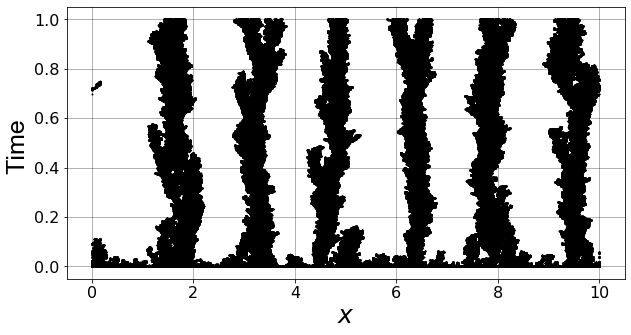

In [7]:
#Plotting the simulation result

n_m=[]
times=np.linspace(0,T_end,n_pt)
for w in range(len(times)):
    for q in range(len(n_t[0])):
        if n_t[w][q]>0:
            n_m.append((x[q],times[w]))

n_x,n_y = np.array(n_m).T


fig1, ax = pl.subplots(figsize=(10, 5))
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)    
ax.scatter(n_x,n_y,color='k',s=1,alpha=1)


ax.tick_params(labelsize=16)
ax.set_ylabel(r"Time ",fontsize=25, fontname="Arial")
ax.set_xlabel(r"$x $",fontsize=25, fontname="Arial")


pl.show()

In [ ]:
#Code for the simulation altered for interative running

import math
def Run(x,n_i,T_end,n_pt,pars,Rb,Rd):
    ok=0
########### Data
    n_t=[]
    times=np.linspace(0,T_end,n_pt)
    wc=0
    
############################### Setting lattice and parameters
    L=len(n_i)
    dx=x[1]-x[0]
    
    Lb=int(Rf//dx)
    Ld=int(Rc//dx)
    
    b,d,D,beta,gamma=pars
    beta2=beta/(2*Rf)
    gamma2=gamma/(4*Rc**2)
    Nmin=(beta2- np.sqrt(beta2**2 +4*(b-d)*gamma2))/(2*gamma2)
    if math.isnan(Nmin):
        Nmin=0
    h=D/(dx**2)
    
    N_i=sum(n_i)
    
    kf = np.ones(2*Lf+1)   # kernel
    kc = np.ones(2*Lc+1)   # kernel
    
    i=0
    if N_i==0:
        return n_i,ok
################################## LOOP
    while i<=T_end and N_i!=0:
    
    ############# Calculate the rates
        
        Nf = convolve(n_i, kf, mode='wrap')
        Nc = convolve(n_i, kc, mode='wrap')
        rates= (b + d + beta*(Nf-1)/(2*Rf)+ gamma*(Nc-1)*(Nc-2)/(4*(Rc**2))+ 2*h)*n_i
        
        Gr=sum(rates)
        
    ############# Find the waiting time
        u1=random.uniform(0,1)
        d_t=-np.log(u1)/Gr 
        
    ############ Save data
        if i+d_t>times[wc]:
            #print(str(100*(i/T_end))+'%')
            n_t.append(deepcopy(n_i))
            wc+=1

    ########### Select the transition
        u2=random.uniform(0,1)
        psum=0
        j=0

    #Select the site of the transition
        while psum<= u2:
            psum+=rates[j]/Gr
            j+=1

    #site=j-1
        psum=psum-rates[j-1]/Gr
        j=j-1

        rates_site_j=[]
        
        rates_site_j.append((b+ beta*(Nf[j]-1)/(2*Rf))*n_i[j]) #Birth in j from n (k=0)

        rates_site_j.append((d+ gamma*(Nc[j]-1)*(Nc[j]-2)/(4*(Rc**2)))*n_i[j])#Death in j from n (k=1)

        rates_site_j.append((h)*n_i[j])# Diffusion in j from n (k=2) - Right
        rates_site_j.append(rates_site_j[2])# Diffusion in j from n (k=3) - Left

    #Select the transition in the site j
        k=0
        while psum<=u2:
            psum+=rates_site_j[k]/Gr
            k+=1

    #All possibilities

        if k-1==0:#Birth of n in j
            n_i[j]+=1
            N_i+=1

        elif k-1<4 and k-1!=0: # Death or difussion of n in j
            

            if k-1==2:#Diffusion Right
                n_i[j]-=1
                n_i[(j+1)%L]+=1


            elif k-1==3:#Diffusion Left
                n_i[j]-=1
                n_i[(j-1)%L]+=1

            else:#Death
                if N_i>0:
                    n_i[j]-=1
                    N_i-=1

        i=i+d_t
        if N_i==0:
            n_t.append(deepcopy(n_i))
            ok=1
    return n_t,ok

In [ ]:
b=40
d=30
beta=0
gamma=0.001
D=0.001

Rf=0.75
Rc=1

n_pt=5000
T_end=2.5

L=1000
x=np.linspace(0,10,L)
dx=x[1]-x[0]

rho_s=(beta+ np.sqrt(beta**2 +4*(b-d)*gamma))//(2*gamma)

n_i=np.zeros(L)

for p in range(L):
    if random.uniform(0,1)<rho_s*dx:
        n_i[p]+=1

bn=list(np.linspace(40,30,15))

PST=[]
trys=25
for j in range(trys):

    print(j)
    rho_s=(beta+ np.sqrt(beta**2 +4*(b-d)*gamma))//(2*gamma)

    n_i=np.zeros(L)

    for p in range(L):
        if random.uniform(0,1)<rho_s*dx:
            n_i[p]+=1
    PS=[]

    for bi in bn:

        pars=[bi,d,D,beta,gamma]        
        n_t,ok=Run(x,n_i,T_end,n_pt,pars,Rf,Rc)
        
        if ok==1:
            PS.append(0)
            break
            
            
        N_t=[sum(n_t[i]) for i in range(len(n_t))]
        PS.append(np.mean(N_t[500:]))
        print('try '+str(j))
        print(np.mean(N_t[1000:]))
        
        n_i=n_t[-1]
        n_m=[]
        times=np.linspace(0,T_end,n_pt)[:len(n_t)]
        for w in range(len(times)):
            for q in range(len(n_t[0])):
                if n_t[w][q]>0:
                    n_m.append((x[q],times[w]))

        n_x,n_y = np.array(n_m).T
        pl.style.use('default')
        fig1, ax = pl.subplots(figsize=(6, 5))
        ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)    
        ax.scatter(n_x,n_y,color='k',s=4,alpha=1)


        ax.tick_params(labelsize=25)
        ax.set_ylabel(r"Time ",fontsize=35, fontname="Arial")
        ax.set_xlabel(r"$x $",fontsize=35, fontname="Arial")
        ax.set_xlim(-0.1,2.1)
        pl.show()


        fig1, ax = pl.subplots(figsize=(6, 5))
        ax.plot(times,N_t)
        pl.show()


    for i in range(len(bn[len(PS):])):
        PS.append(0)
    
    PS=np.array(PS)
    
    PST.append(PS)

# Population level model

In [16]:
import warnings; warnings.simplefilter('ignore')

L0=10 # The size of the Grid

N=2**(12) # Number of points I'm using
#N=2000
dx=L0/N # Space between points - X direction

x = np.arange(-L0/2, L0/2, dx) # X axis

nyq=np.pi/(dx*2)

kx=2*np.pi*np.fft.fftfreq(N,d=x[1]-x[0]) 




fs=dx/2
cutoff= 50
order=8

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    #b, a = bessel(order, normal_cutoff, btype='low', analog=False, norm='phase')
    y = filtfilt(b, a, data)
    return y





nf=np.pi/(dx)
filt=[]
for i in kx:
    
    if abs(i)>nf:
        filt.append(0)
    else:
        filt.append(1)       
filt=np.array(filt)




def G_hat(kx,Rl):
    #G= np.exp((-(x/R)**(2*alpha)))

    #Norm = integrate.quad(lambda x1: np.exp((-(x1/R)**(2*alpha))), -np.inf, np.inf)[0]

    #G=G/Norm
        
    #G_hat=pyfftw.builders.fft(G,threads=3)
    
    G_hat=np.sin(kx*Rl)/(kx*Rl) # Sinc(x) function
    G_hat=np.nan_to_num(G_hat, copy=True, nan=1, posinf=None, neginf=None) # Taking into accont that Sinc(0)=1
    return G_hat



def Cb(rho_hat,Gb):

    
    conv = pyfftw.builders.ifft(Gb*rho_hat,threads=3) # The convolution part
    
    return  conv().real #Substituting in the function
    
    
    
    
def Cd(rho_hat,Gd):

    
    conv = pyfftw.builders.ifft(Gd*rho_hat,threads=3) # The convolution part
    
    return (conv().real)**2 #Substituting in the function






def Phi(u_hat,Gb,Gd):

    u=pyfftw.builders.ifft(u_hat,threads=3)
    u=u().real
    
    Phi_b=pyfftw.builders.fft(u*Cb(u_hat,Gb),threads=3)
    Phi_d=pyfftw.builders.fft(u*Cd(u_hat,Gd),threads=3)
    #Phi_b=pyfftw.builders.fft(butter_lowpass_filter(u*Cb(u_hat,Gb), cutoff, fs, order),threads=3)
    #Phi_d=pyfftw.builders.fft(butter_lowpass_filter(u*Cd(u_hat,Gd), cutoff, fs, order),threads=3)
    
    
    
    return  Phi_b()*filt -Phi_d()*filt



r=-0.2
D=10**(-3)


dt=0.005
T=2000
ts=np.arange(0,T*dt,dt)

rho_s=(1+ np.sqrt(1 +4*r))/2

rh0=np.zeros(len(x))
for i in range(120):
    m=random.randint(2,70)
    fase= random.randint(2,70)
    rh0+=np.sin(2*np.pi*m*x/L0  + fase)
rh0=rh0*0.001+ rho_s



def Sim(uo,pars):
    
    r,R,D = pars

    Gb=G_hat(kx,R) #For the birth
    Gd=G_hat(kx,1) #For the death

    alpha=D*(kx**2) - r

    Nt=[sum(uo[970:1140])*dx]
    
    uo_hat=pyfftw.builders.fft(uo,threads=3)
    uo_hat=uo_hat()

    for t in range(len(ts)):

        Phi_0=Phi(uo_hat,Gb,Gd)

        u1_hat=np.exp(-alpha*dt)*uo_hat + ((1-np.exp(-alpha*dt))/alpha)*Phi_0
        
        u1=pyfftw.builders.ifft(u1_hat,threads=3)
        
        #Nt.append(sum(u1().real)*dx)

        Phi_1=Phi(u1_hat,Gb,Gd)

        u2_hat=np.exp(-2*alpha*dt)*uo_hat + ((1-np.exp(-2*alpha*dt))/alpha)*Phi_1
        
        u2=pyfftw.builders.ifft(u2_hat,threads=3)
        
        Nt.append(sum(u2().real)*dx)

        if t % 200 == 0 : #Plotting 
            print('Time = '+str(t))
            fig1, ax = pl.subplots(figsize=(8, 4))
            ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)


            ax.plot(x,u2().real,'b-', linewidth=2.5)

            ax.tick_params(labelsize=16)
            ax.set_ylabel(r"$\rho $",fontsize=25, fontname="Arial")
            ax.set_xlabel(r"$x $",fontsize=25, fontname="Arial")
            ax.axhline(rho_s, 0, 600,c='r',linestyle='--',lw=2,label='Line Legend')
            pl.show()


        uo_hat=u2_hat

    u=pyfftw.builders.ifft(uo_hat,threads=3)
    return u().real, np.array(Nt)

Time = 0


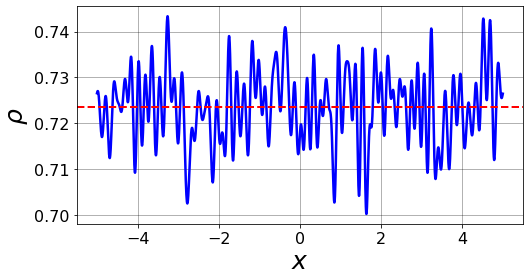

Time = 200


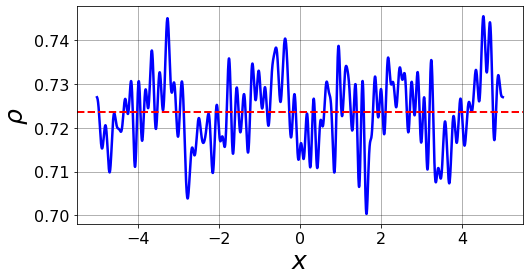

Time = 400


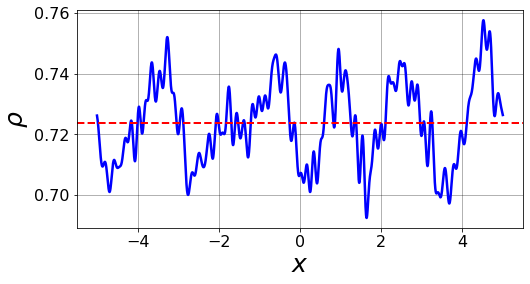

Time = 600


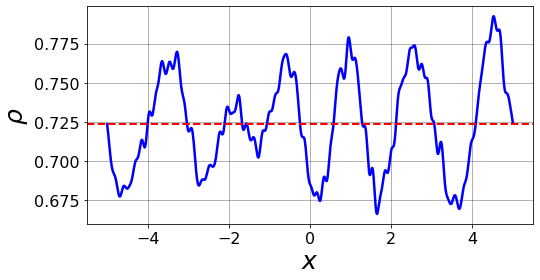

Time = 800


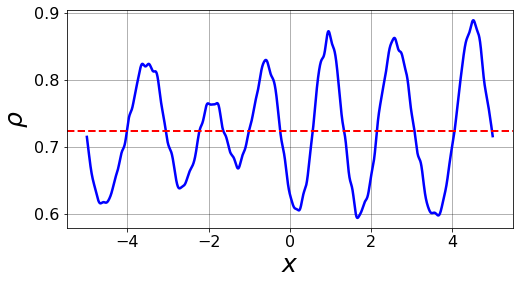

Time = 1000


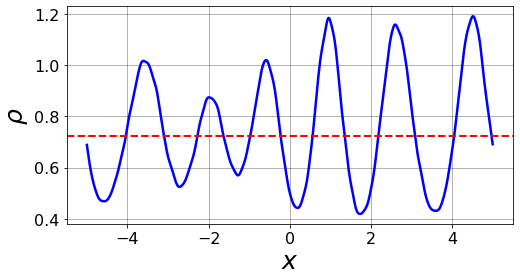

Time = 1200


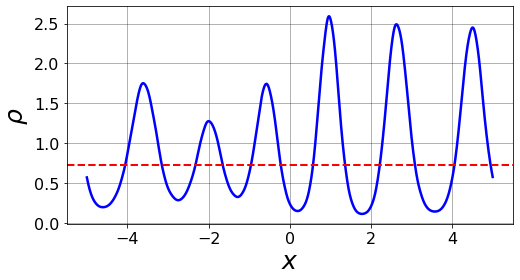

Time = 1400


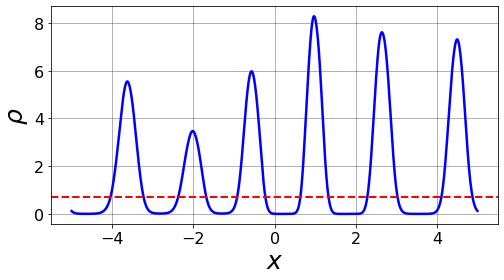

Time = 1600


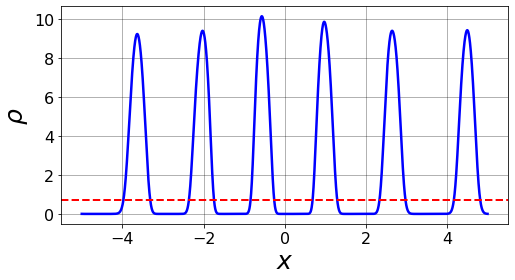

Time = 1800


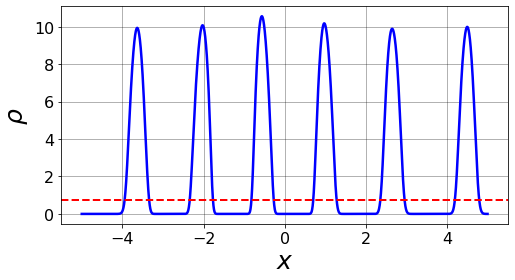

Time = 2000


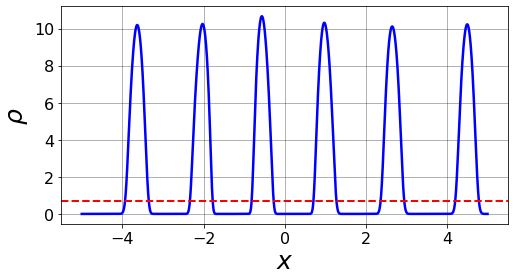

Time = 2200


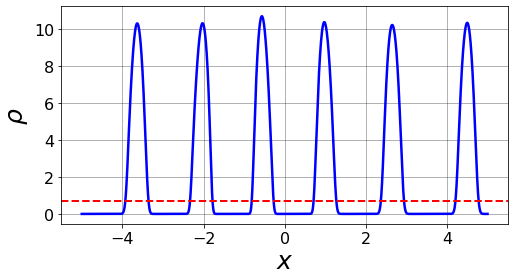

Time = 2400


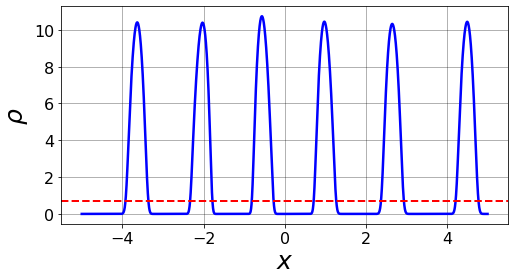

Time = 2600


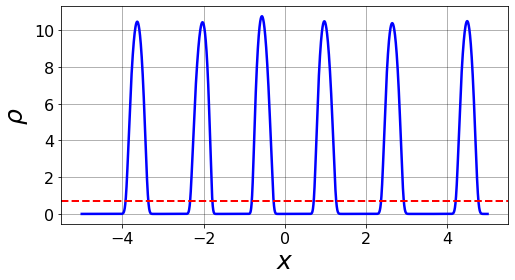

Time = 2800


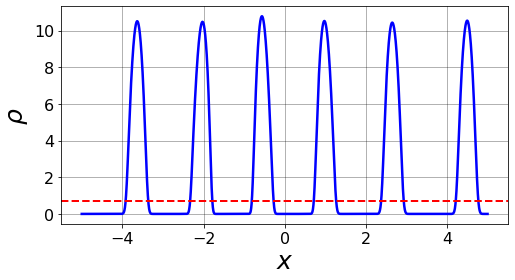

Time = 3000


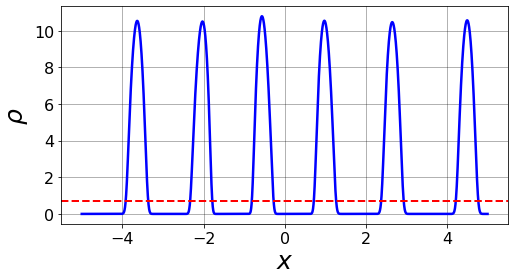

Time = 3200


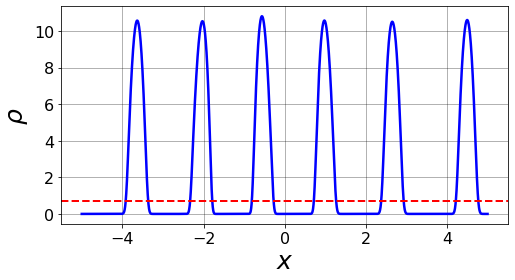

Time = 3400


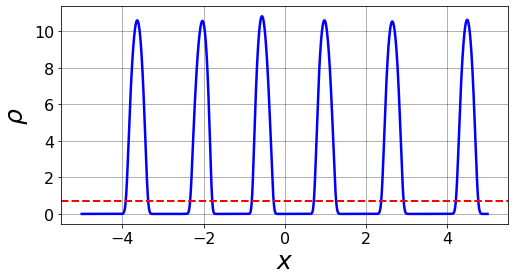

Time = 3600


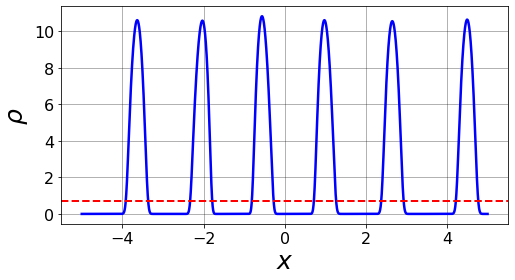

Time = 3800


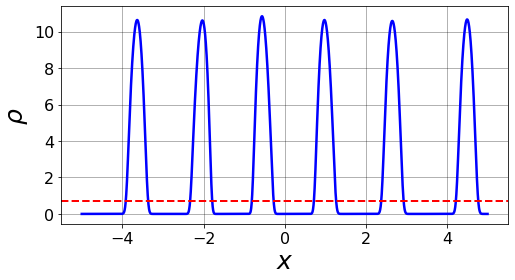

Time = 4000


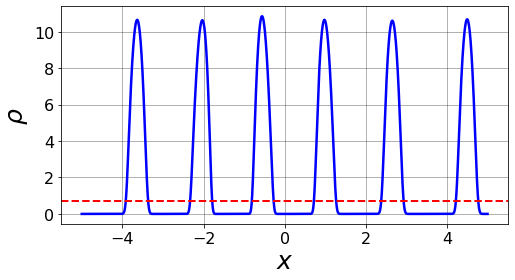

Time = 4200


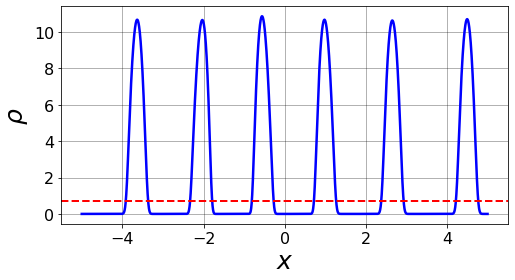

Time = 4400


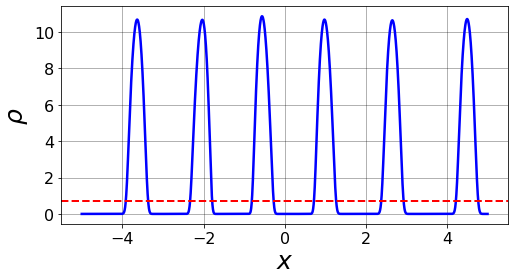

Time = 4600


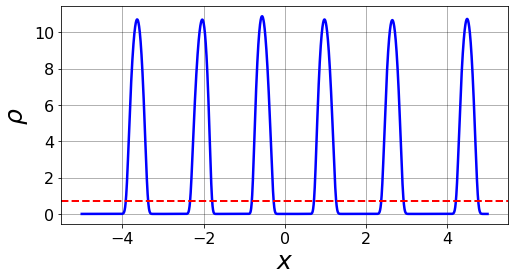

Time = 4800


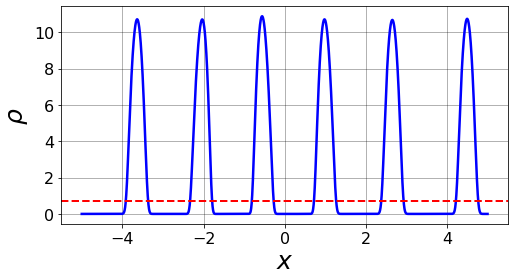

In [17]:
#simulating

#gamma=0.1
#beta=4
R=0.5
r=-0.2
D=0.0001

dt=0.005
T=5000
ts=np.arange(0,T*dt,dt)

rho_s=(1+ np.sqrt(1 +4*r))/2

rh0=np.zeros(len(x))
for i in range(120):
    m=random.randint(2,70)
    fase= random.randint(2,70)
    rh0+=np.sin(2*np.pi*m*x/L0  + fase)
rh0=rh0*0.001+ rho_s


pars = [r,R,D]

ug1=Sim(rh0,pars)

In [ ]:
#Supplementary Information 3 for deterministic iteration simulations


R=0.5
r=-0.01
D=0.0001

dt=0.005
T=5000
ts=np.arange(0,T*dt,dt)

rho_s=(1+ np.sqrt(1 +4*r))/2

rh0=np.zeros(len(x))
for i in range(120):
    m=random.randint(2,70)
    fase= random.randint(2,70)
    rh0+=np.sin(2*np.pi*m*x/L0  + fase)
rh0=rh0*0.001+ rho_s


pars = [r,R,D]

ug1=Sim(rh0,pars)



import warnings; warnings.simplefilter('ignore')

L0=10# The size of the Grid

N=2**(12) # Number of points I'm using
#N=4000
dx=L0/N # Space between points - X direction

x = np.arange(-L0/2, L0/2, dx) # X axis

nyq=np.pi/(dx*2)

kx=2*np.pi*np.fft.fftfreq(N,d=x[1]-x[0]) 




fs=dx/2
cutoff= 50
order=8

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    #b, a = bessel(order, normal_cutoff, btype='low', analog=False, norm='phase')
    y = filtfilt(b, a, data)
    return y





nf=np.pi/(dx)
filt=[]
for i in kx:
    
    if abs(i)>nf:
        filt.append(0)
    else:
        filt.append(1)       
filt=np.array(filt)



def G_hat(kx,Rl):
    #G= np.exp((-(x/R)**(2*alpha)))

    #Norm = integrate.quad(lambda x1: np.exp((-(x1/R)**(2*alpha))), -np.inf, np.inf)[0]

    #G=G/Norm
        
    #G_hat=pyfftw.builders.fft(G,threads=3)
    
    G_hat=np.sin(kx*Rl)/(kx*Rl) # Sinc(x) function
    G_hat=np.nan_to_num(G_hat, copy=True, nan=1, posinf=None, neginf=None) # Taking into accont that Sinc(0)=1
    return G_hat



def Cb(rho_hat,Gb):

    
    conv = pyfftw.builders.ifft(Gb*rho_hat,threads=3) # The convolution part
    
    return  conv().real #Substituting in the function
    
    
    
    
def Cd(rho_hat,Gd):

    
    conv = pyfftw.builders.ifft(Gd*rho_hat,threads=3) # The convolution part
    
    return (conv().real)**2 #Substituting in the function






def Phi(u_hat,Gb,Gd):

    u=pyfftw.builders.ifft(u_hat,threads=3)
    u=u().real
    
    Phi_b=pyfftw.builders.fft(u*Cb(u_hat,Gb),threads=3)
    Phi_d=pyfftw.builders.fft(u*Cd(u_hat,Gd),threads=3)
    #Phi_b=pyfftw.builders.fft(butter_lowpass_filter(u*Cb(u_hat,Gb), cutoff, fs, order),threads=3)
    #Phi_d=pyfftw.builders.fft(butter_lowpass_filter(u*Cd(u_hat,Gd), cutoff, fs, order),threads=3)
    
    
    
    return   -gamma*Phi_d()*filt


dt=0.005
T=2000
ts=np.arange(0,T*dt,dt)





def Sim(uo,pars):
    
    r,R,D = pars

    Gb=G_hat(kx,R) #For the birth
    Gd=G_hat(kx,1) #For the death

    alpha=D*(kx**2) - r
    
    uo_hat=pyfftw.builders.fft(uo,threads=3)
    uo_hat=uo_hat()

    for t in range(len(ts)):

        Phi_0=Phi(uo_hat,Gb,Gd)

        u1_hat=np.exp(-alpha*dt)*uo_hat + ((1-np.exp(-alpha*dt))/alpha)*Phi_0
        
        u1=pyfftw.builders.ifft(u1_hat,threads=3)
        

        Phi_1=Phi(u1_hat,Gb,Gd)

        u2_hat=np.exp(-2*alpha*dt)*uo_hat + ((1-np.exp(-2*alpha*dt))/alpha)*Phi_1
        
        u2=pyfftw.builders.ifft(u2_hat,threads=3)
        



        uo_hat=u2_hat
        
        
    fig1, ax = pl.subplots(figsize=(8, 4))
    ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)


    ax.plot(x,u2().real,'b-', linewidth=2.5)
    ax.tick_params(labelsize=16)
    ax.set_ylabel(r"$\rho $",fontsize=25, fontname="Arial")
    ax.set_xlabel(r"$x $",fontsize=25, fontname="Arial")
    ax.axhline(rho_s, 0, 600,c='r',linestyle='--',lw=2,label='Line Legend')
    pl.show()
    
    
    
    u=pyfftw.builders.ifft(uo_hat,threads=3)
    return u().real


import warnings; warnings.simplefilter('ignore')
from scipy import optimize
Gb=G_hat(kx,R) #For the birth
Gd=G_hat(kx,1) #For the death

def Run_PDE(u,Gb,Gd):
    alpha=D*(kx**2) - r
    uo_hat=pyfftw.builders.fft(u,threads=3)
    uo_hat=uo_hat()
    
    Phi_0=Phi(uo_hat,Gb,Gd)

    u1_hat=np.exp(-alpha*dt)*uo_hat + ((1-np.exp(-alpha*dt))/alpha)*Phi_0

    u1=pyfftw.builders.ifft(u1_hat,threads=3)

    Phi_1=Phi(u1_hat,Gb,Gd)

    u2_hat=np.exp(-2*alpha*dt)*uo_hat + ((1-np.exp(-2*alpha*dt))/alpha)*Phi_1
    u2=pyfftw.builders.ifft(u2_hat,threads=3)
    
    return (u2().real - u) 



def Deriv(av):
    return sum(abs(Run_PDE(u*av,Gb,Gd)))*dx

def Deriv1(av):
    return sum(Run_PDE(u*av,Gb,Gd))*dx

dt=0.005 
T=5000
ts=np.arange(0,T*dt,dt) 

uf=[] #Stable point

ul=[] #Unstable point

uf.append(sum(ug1*dx)/L0)
ul.append(0)

u0=ug1

rv=np.linspace(-0.01,-0.5,30)

for i in rv:

    r=i
    pars = [i,R,D]
    u=Sim(u0,pars)
    
   

    res = optimize.minimize_scalar(Deriv, bounds=(0.001, 0.99999), method='bounded')
    
    
    print(res.x)
    
    
    uf.append(sum(u)*dx/L0)
    ul.append(sum(u)*dx*res.x/L0)
    #print(ul)
    
    av=np.linspace(0,1,50)
    pl.plot(av,[Deriv(a) for a in av])
    pl.axhline(0, 0, 600,c='r',linestyle='--',lw=2,label='Line Legend')
    pl.show()
    
    u0=u


# Group Level Model 

In [25]:
from scipy.integrate import odeint
def MF(f,t,parametros):
    #parameters
    r,R,N_m = parametros
    #variables
    n_m=[]
    n_m.append(0)
    n_m.append(0)
    for i in range(N_m):
        n_m.append(f[i])
    n_m.append(0)
    n_m.append(0)
    
    dn_dt=np.zeros(N_m)
    
    for j in range(len(dn_dt)):
    
        eta=n_m[j]+n_m[j+1]+n_m[j+2]+n_m[j+3]+n_m[j+4]
    
        dn_dt[j] = (r+ eta - (n_m[j+2]/2)**2)*n_m[j+2]
    
    return dn_dt

def MF2(f,t,parametros):
    #parameters
    r,R,N_m = parametros
    #variables
    n_m=[0]
    for i in range(N_m):
        n_m.append(f[i])
    n_m.append(0)
    
    dn_dt=np.zeros(N_m)
    
    for j in range(len(dn_dt)):
    
        eta=n_m[j+1]
    
        dn_dt[j] = (r+ eta - (n_m[j+1]/2)**2)*n_m[j+1]
    
    return dn_dt


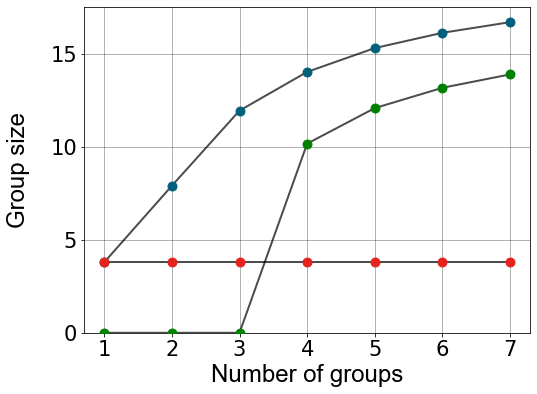

In [27]:
P_n=[]
P_n2=[]
P_n3=[]
for N_m in np.arange(7)+1:
    
    ts0=np.linspace(0,100,1000)
    q0 = np.zeros(N_m)+10

    r=-0.2
    R2=0.5
    R=2.
    r3=-10
    #parameters
    parode = r,R,N_m
    parode2 = r,R2,N_m
    parode3 = r3,R,N_m
    #calls integrator
    qs = odeint(MF,q0, ts0,args=(parode,),mxstep=1000000,rtol=1e-10)
    qs2 = odeint(MF2,q0, ts0,args=(parode2,),mxstep=1000000,rtol=1e-10)
    qs3 = odeint(MF,q0, ts0,args=(parode3,),mxstep=1000000,rtol=1e-10)

    Pop=0
    Pop2=0
    Pop3=0
    for i in range(N_m):
        Pop+=qs[:,i][-1]
        Pop2+=qs2[:,i][-1]
        Pop3+=qs3[:,i][-1]
    
    P_n.append(Pop/N_m)
    P_n2.append(Pop2/N_m)
    P_n3.append(Pop3/N_m)
    
fig, ax = pl.subplots(figsize=(8, 6))
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

x=np.linspace(1,len(P_n),len(P_n))
ax.scatter(x,P_n,color='#005f7b',zorder=3,s=80)
ax.scatter(x,P_n2,color='#e4231c',zorder=3,s=80)
ax.scatter(x,P_n3,color='green',zorder=3,s=80)
ax.plot(x,P_n,color='k',alpha=0.7,lw=2)
ax.plot(x,P_n2,color='k',alpha=0.7,lw=2)
ax.plot(x,P_n3,color='k',alpha=0.7,lw=2)
ax.set_ylim(bottom=0)
ax.tick_params(labelsize=21)


ax.set_ylabel(r"Group size",fontsize=24, fontname="Arial",rotation=90,labelpad=20)
ax.set_xlabel(r"Number of groups",fontsize=24, fontname="Arial")

pl.show()